# Iris Flower Dataset


In [1]:
#Primero importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ahora leo el dataset del IRIS y lo muestro
df = pd.read_csv("IRIS.csv");
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Con esto ya vi el contenido en general del data set entonces voy a separarlo como dice en teams tomanto en cuenta las entradas y salidas para manejarlas mejor asi

## Creacion del DataFrame

In [3]:
# Primero con inputs
# Filtrar los inputs para que coincidan con las especies filtradas
inputs1 = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])][['sepal_length', 'petal_length']]

# Y con labels
# Filtrar solo 'Iris-setosa' e 'Iris-versicolor'
labels1 = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])][['species']]


## Operaciones del DataFrame

In [4]:
#Compruebo que si sean las que necesito
labels1['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [5]:
# Y voy a convertirlos en arreglos de numpy para trabajarlos como se realizo en clases
# Usando .to_numpy()
inputs = inputs1.to_numpy()
labels = labels1.to_numpy()

In [6]:
inputs.shape

(100, 2)

In [7]:
#labels

### Pero en este momento recorde que solo se puede trabajar con datos numericos entonces labels no estaba bien asi y tengo que cambiarlo donde:
Iris-setosa --> 0

Iris-versicolor --> 1

In [8]:
#  Asignar 0 o 1 según la especie
labels = np.where(labels == 'Iris-setosa', 0, 1)
labels.shape

(100, 1)

## Grafica de dispersión Scatter

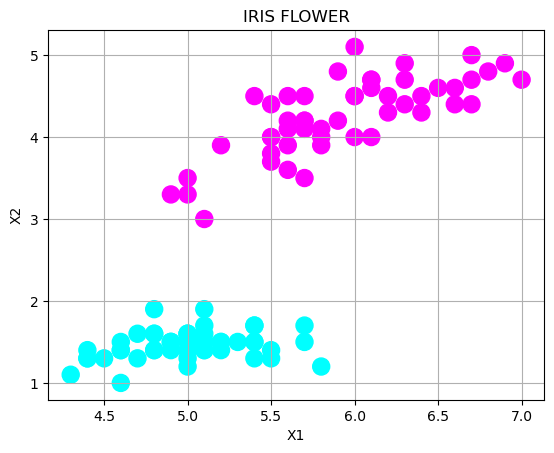

In [9]:
#Graficar los datos para observar si son linealmente separables
plt.scatter(inputs[:,0], inputs[:,1], c=labels,cmap='cool',marker='o',s=150)
plt.title("IRIS FLOWER")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

### Conclusion momentaneas
Con esto voy observando que los datos son linealmente separables y el problema solo existen ya 2 posibles resultados: 0 ó 1

Iris-setosa --> 0 

Iris-versicolor --> 1

In [127]:
# Definicion de hiperparametro
learning_rate = 0.005
bias = np.random.rand() #0.122
epochs = 2
weights = np.random.rand(2) #[0.356,0.259] #No es hiperparametro

## Preguntar:

Preguntar si no seria una buena practica agregar una seed para siempre comenzar desde un punto enconcreto y así poder refinar bien los hieperparametros y no sea tan aleatorio

In [11]:
# Importar la clase desde el archivo
from perceptron_simple_and import Perceptron

## Voy importar el modulo para poder reutilizar la clase Perceptron desde el modulo perceptron_simple_and

### Donde tuve que transformarlo a .py para poder usar este estilo de programación satisfactoriamente porque vi que con el .ipynb(el de Jupter) no me permitia importar el modulo

In [128]:
perceptron = Perceptron(inputs,labels,learning_rate,weights,bias,epochs)
#Entrenar el perceptron
w,b = perceptron.fit() #w=weightsb=bias
print(f"Weights fit: {w}, Bias fit:{b}")

Epoch 1/2 Average Error: [0.25]
Epoch 2/2 Average Error: [0.]
Weights fit: [-0.27844631  0.50701824], Bias fit:[0.3444174]


In [82]:
# Realizar nuestras predicciones
print(f"[5.1,1.4]--> {perceptron.predict([5.1,1.4],w,b)}") #deberia dar Iris-setosa --> 0
print(f"[5.7,4.2]--> {perceptron.predict([5.7,4.2],w,b)}") #deberia dar Iris-versicolor --> 1
print(f"[4.9,1.4]--> {perceptron.predict([4.9,1.4],w,b)}") #deberia dar Iris-setosa --> 0

[5.1,1.4]--> 0
[5.7,4.2]--> 1
[4.9,1.4]--> 0


In [129]:
# Para poder realizar las predicciones con los datos:
df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])][['sepal_length', 'petal_length','species']]

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor


# Donde muestro que en tan solo una epoca (epochs) basto para entrenarse con un error minimo del 0.02

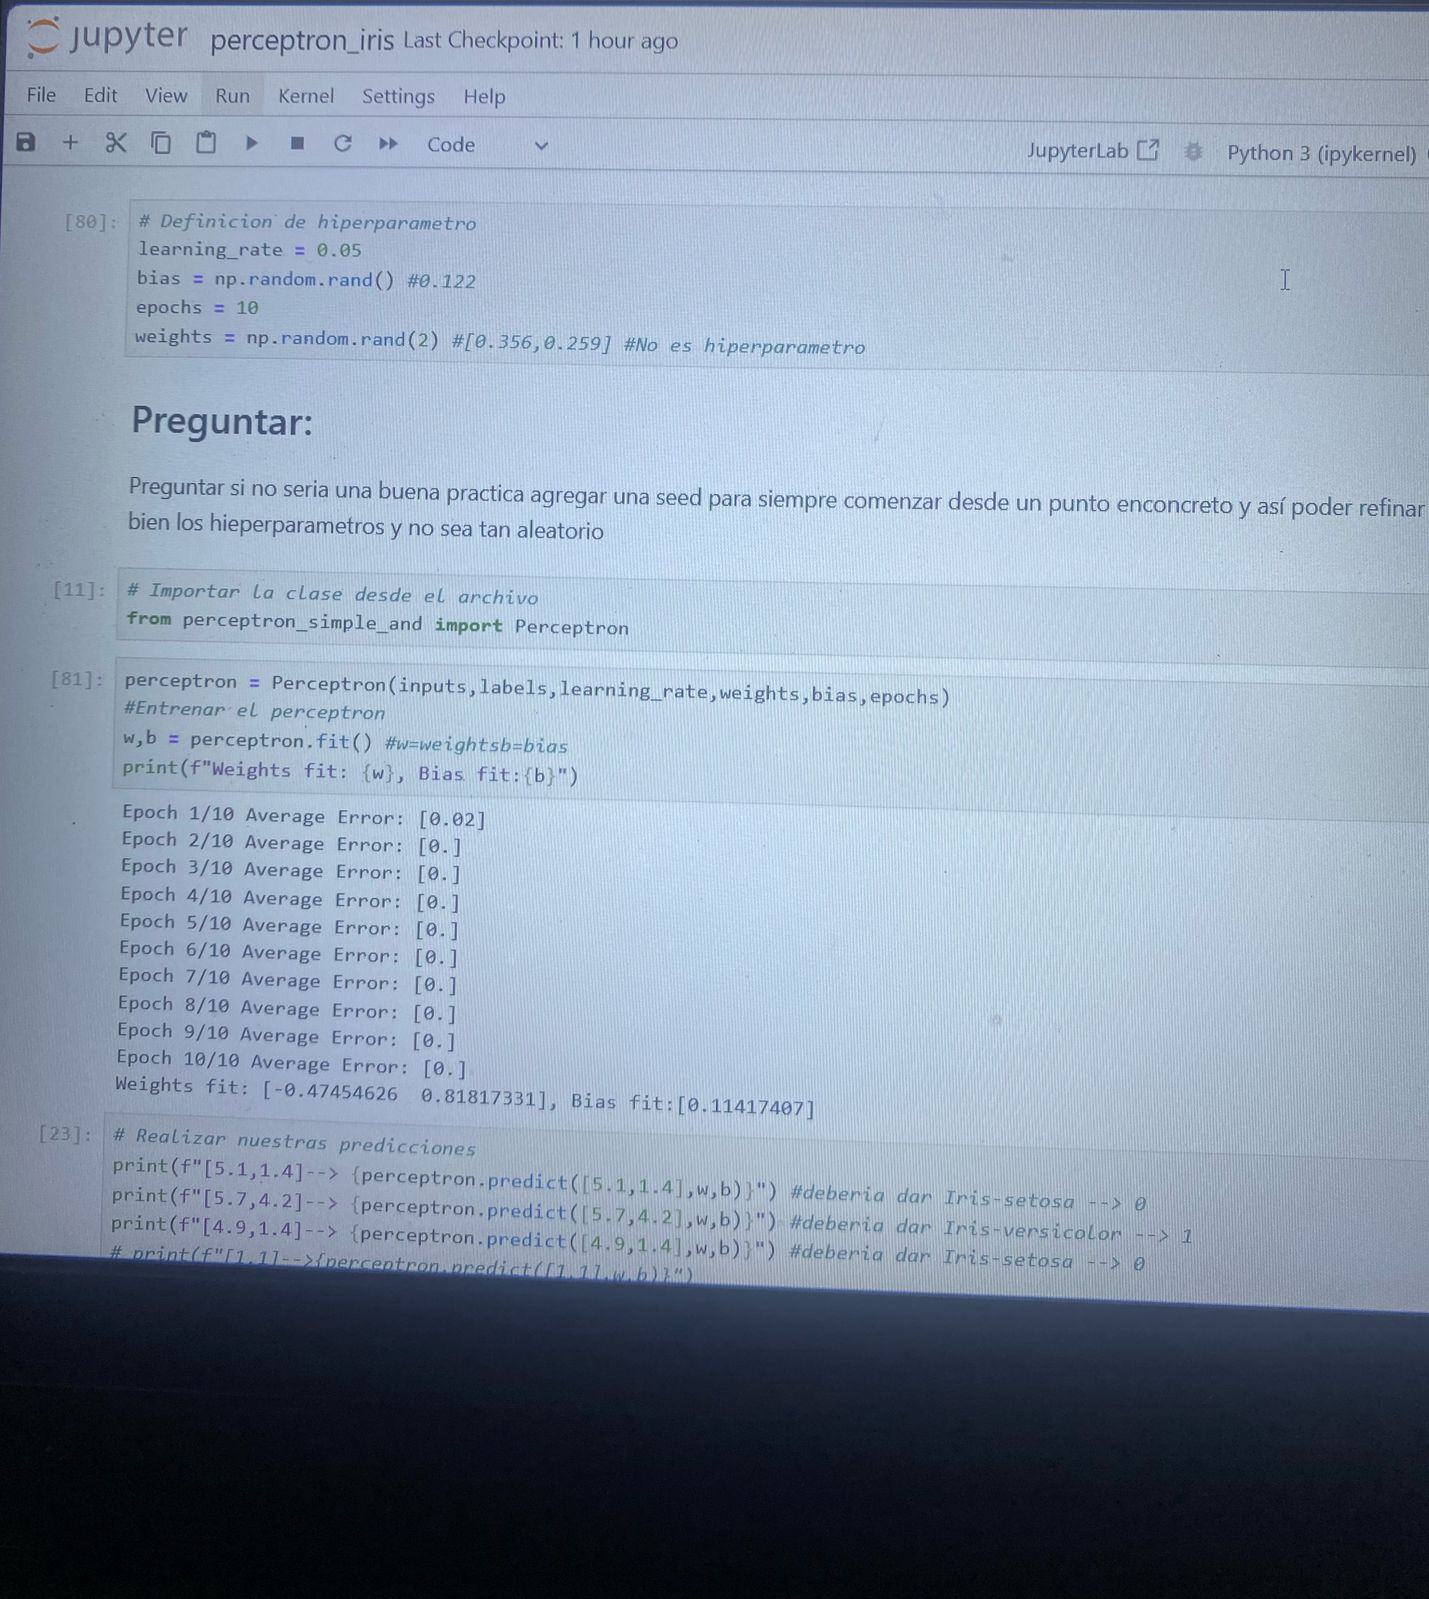